# This jupyter notebook provides various analysis about phonon results

In [88]:
%aiida
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## imports and settings

In [89]:
import os
import yaml
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
from aiidaplus.plot import band_plot, band_plots, DEFAULT_COLORS
import phonopy

phonon_dir = os.path.join('..', 'data', 'phonon')

## extract yaml files

In [90]:
yamlfiles = [ name for name in os.listdir(phonon_dir) if 'yaml' in name ]
phonons = []
for yamlfile in yamlfiles:
    phonons.append(phonopy.load(os.path.join(phonon_dir, yamlfile)))

## band plot (label auto)

# band path is set automalically


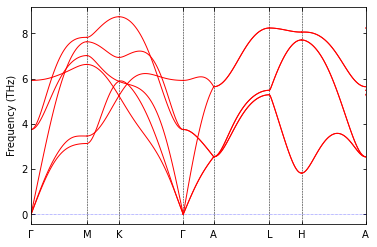

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
band_plot(ax, phonons[0], is_auto=True)

## band plots (label auto)

# band path is set automalically
# band path is set automalically


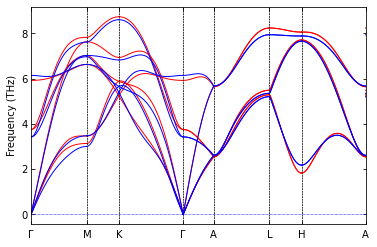

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
band_plots(ax, phonons, is_auto=True)

In [18]:
phonons[1].band_structure.distances[-1]
phonon.band_structure.labels

array([1.3085543 , 1.31087657, 1.31319884, 1.31552111, 1.31784339,
       1.32016566, 1.32248793, 1.3248102 , 1.32713247, 1.32945475,
       1.33177702, 1.33409929, 1.33642156, 1.33874383, 1.34106611,
       1.34338838, 1.34571065, 1.34803292, 1.35035519, 1.35267747,
       1.35499974, 1.35732201, 1.35964428, 1.36196655, 1.36428883,
       1.3666111 , 1.36893337, 1.37125564, 1.37357792, 1.37590019,
       1.37822246, 1.38054473, 1.382867  , 1.38518928, 1.38751155,
       1.38983382, 1.39215609, 1.39447836, 1.39680064, 1.39912291,
       1.40144518, 1.40376745, 1.40608972, 1.408412  , 1.41073427,
       1.41305654, 1.41537881, 1.41770108])

In [26]:
segment_lengths = []
for phonon in phonons:
    lengths = []
    for distance in phonon.band_structure.distances:
        init = 0
        end = distance[-1]
        lengths.append(end - init)
        init = end
    segment_lengths.append(lengths)

In [29]:
ranp.array(segment_lengths)[1,:] / np.array(segment_lengths)[0,:]

array([1.00034883, 1.00034883, 1.00034883, 1.00031091, 1.00031977,
       1.00032323, 1.00032815, 1.00031091, 1.00029633])

In [83]:
# phonons[1].band_structure.distances[0] / segment_lengths[1][0]
phonons[1].band_structure.distances

array([0.        , 0.00232013, 0.00464027, 0.0069604 , 0.00928054,
       0.01160067, 0.01392081, 0.01624094, 0.01856108, 0.02088121,
       0.02320134, 0.02552148, 0.02784161, 0.03016175, 0.03248188,
       0.03480202, 0.03712215, 0.03944229, 0.04176242, 0.04408255,
       0.04640269, 0.04872282, 0.05104296, 0.05336309, 0.05568323,
       0.05800336, 0.0603235 , 0.06264363, 0.06496376, 0.0672839 ,
       0.06960403, 0.07192417, 0.0742443 , 0.07656444, 0.07888457,
       0.0812047 , 0.08352484, 0.08584497, 0.08816511, 0.09048524,
       0.09280538, 0.09512551, 0.09744565, 0.09976578, 0.10208591,
       0.10440605, 0.10672618, 0.10904632, 0.11136645, 0.11368659,
       0.11600672, 0.11832686, 0.12064699, 0.12296712, 0.12528726,
       0.12760739, 0.12992753, 0.13224766, 0.1345678 , 0.13688793,
       0.13920807, 0.1415282 , 0.14384833, 0.14616847, 0.1484886 ,
       0.15080874, 0.15312887, 0.15544901, 0.15776914, 0.16008928,
       0.16240941, 0.16472954, 0.16704968, 0.16936981, 0.17168

In [80]:
phonons[1].band_structure.distances[1]

array([0.19953156, 0.20188257, 0.20423359, 0.2065846 , 0.20893561,
       0.21128662, 0.21363763, 0.21598865, 0.21833966, 0.22069067,
       0.22304168, 0.2253927 , 0.22774371, 0.23009472, 0.23244573,
       0.23479674, 0.23714776, 0.23949877, 0.24184978, 0.24420079,
       0.24655181, 0.24890282, 0.25125383, 0.25360484, 0.25595585,
       0.25830687, 0.26065788, 0.26300889, 0.2653599 , 0.26771092,
       0.27006193, 0.27241294, 0.27476395, 0.27711496, 0.27946598,
       0.28181699, 0.284168  , 0.28651901, 0.28887003, 0.29122104,
       0.29357205, 0.29592306, 0.29827408, 0.30062509, 0.3029761 ,
       0.30532711, 0.30767812, 0.31002914, 0.31238015, 0.31473116])